# Operaciones morfológicas

In [1]:
#importación de librerías
import cv2     #Librería OpenCV
from IPython.display import Image   #Libreria impresión de imagenes
import numpy as np                  #Importación numpy
from matplotlib import pyplot as plt  #Impresión de gráficas

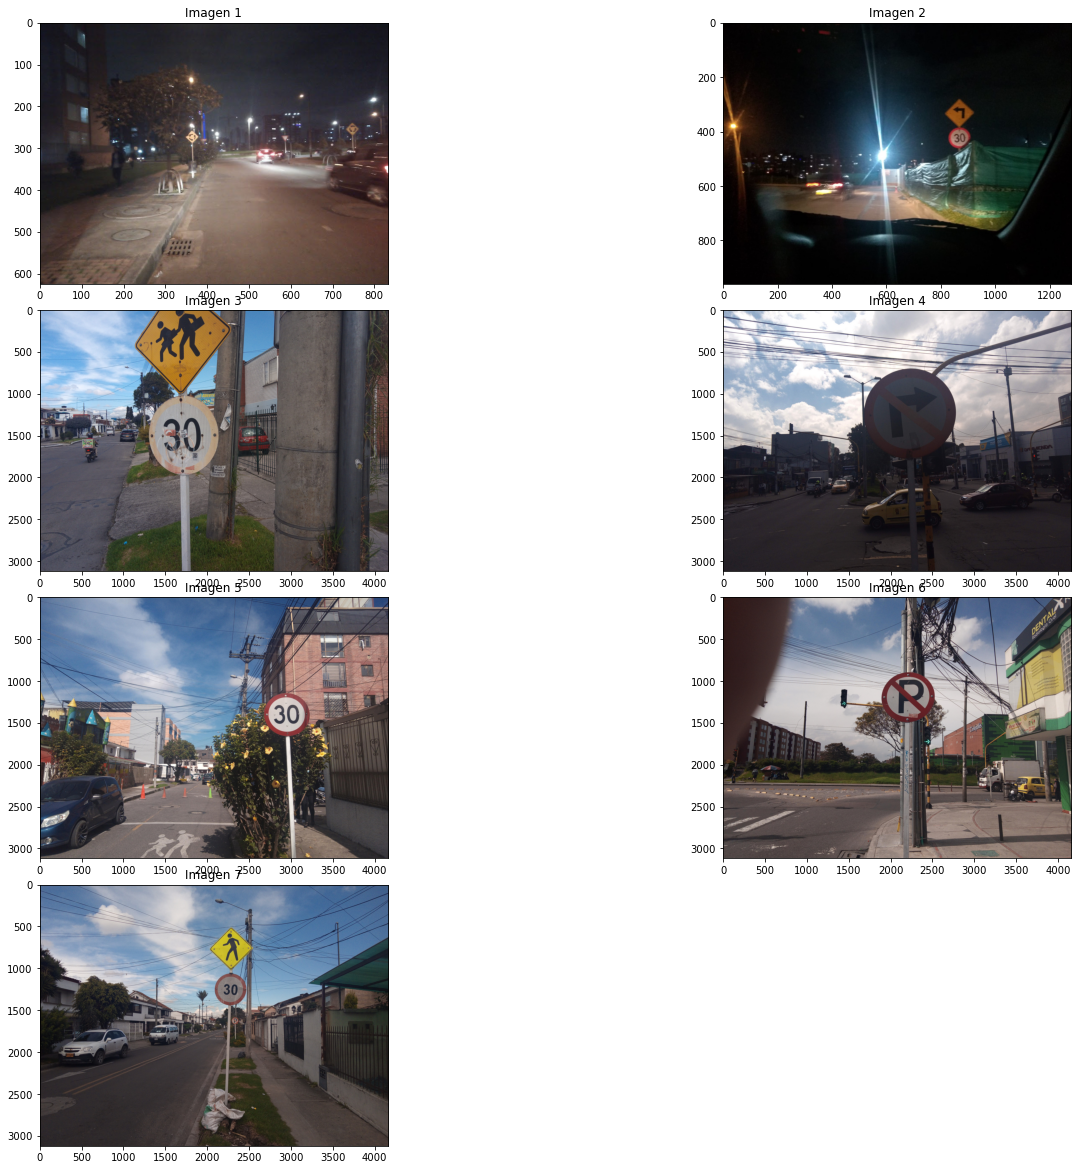

In [2]:
#lectura de las imágenes
ima1=cv2.imread("img/ima3.jpeg")
ima2=cv2.imread("img/ima6.jpeg")
ima3=cv2.imread("img/ima7.jpg")
ima4=cv2.imread("img/ima8.jpg")
ima5=cv2.imread("img/ima9.jpg")
ima6=cv2.imread("img/ima10.jpg")
ima7=cv2.imread("img/ima11.jpg")
#conversión de las imágenes de BGR a RGB
ima1=cv2.cvtColor(ima1,cv2.COLOR_BGR2RGB)
ima2=cv2.cvtColor(ima2,cv2.COLOR_BGR2RGB)
ima3=cv2.cvtColor(ima3,cv2.COLOR_BGR2RGB)
ima4=cv2.cvtColor(ima4,cv2.COLOR_BGR2RGB)
ima5=cv2.cvtColor(ima5,cv2.COLOR_BGR2RGB)
ima6=cv2.cvtColor(ima6,cv2.COLOR_BGR2RGB)
ima7=cv2.cvtColor(ima7,cv2.COLOR_BGR2RGB)
#se imprimen las imágenes para verificar correcto funcionamiento
plt.figure(1);
plt.subplot(4,2,1);plt.imshow(ima1),plt.title('Imagen 1')
plt.subplot(4,2,2);plt.imshow(ima2),plt.title('Imagen 2')
plt.subplot(4,2,3);plt.imshow(ima3),plt.title('Imagen 3')
plt.subplot(4,2,4);plt.imshow(ima4),plt.title('Imagen 4')
plt.subplot(4,2,5);plt.imshow(ima5),plt.title('Imagen 5')
plt.subplot(4,2,6);plt.imshow(ima6),plt.title('Imagen 6')
plt.subplot(4,2,7);plt.imshow(ima7),plt.title('Imagen 7')
plt.subplots_adjust(top=4, bottom=0.1, left=0.10, right=3, hspace=0.1, wspace=0.2)

In [3]:
def umb_adap(imagen,sz,c):
    imagen=cv2.cvtColor(imagen,cv2.COLOR_RGB2YCrCb)
    Y,Cr,Cb = cv2.split(imagen)
    ima = cv2.adaptiveThreshold(Cr,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,sz,c)
    return ima

In [4]:
def dilatacion(imagen,a,b,n):
    # Creación de elementos estructurantes
    kernel1 = cv2.getStructuringElement(cv2.MORPH_RECT,(a,b))
    kernel2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(a,b))
    kernel3 = cv2.getStructuringElement(cv2.MORPH_CROSS,(a,b))
    rect = cv2.dilate(imagen,kernel1,n)
    elipse = cv2.dilate(imagen,kernel2,n)
    cross = cv2.dilate(imagen,kernel3,n)
    return rect, elipse, cross

In [5]:
def erosion(imagen,a,b,n):
    # Creación de elementos estructurantes
    kernel1 = cv2.getStructuringElement(cv2.MORPH_RECT,(a,b))
    kernel2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(a,b))
    kernel3 = cv2.getStructuringElement(cv2.MORPH_CROSS,(a,b))
    rect = cv2.erode(imagen,kernel1,n)
    elipse = cv2.erode(imagen,kernel2,n)
    cross = cv2.erode(imagen,kernel3,n)
    return rect, elipse, cross

In [6]:
def apertura(imagen,a,b,n):
    # Creación de elementos estructurantes
    kernel1 = cv2.getStructuringElement(cv2.MORPH_RECT,(a,b))
    kernel2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(a,b))
    kernel3 = cv2.getStructuringElement(cv2.MORPH_CROSS,(a,b))
    rect = cv2.morphologyEx(imagen, cv2.MORPH_OPEN, kernel1)
    elipse = cv2.morphologyEx(imagen, cv2.MORPH_OPEN, kernel2)
    cross = cv2.morphologyEx(imagen, cv2.MORPH_OPEN, kernel3)
    return rect, elipse, cross

In [7]:
def cierre(imagen,a,b,n):
    # Creación de elementos estructurantes
    kernel1 = cv2.getStructuringElement(cv2.MORPH_RECT,(a,b))
    kernel2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(a,b))
    kernel3 = cv2.getStructuringElement(cv2.MORPH_CROSS,(a,b))
    rect = cv2.morphologyEx(imagen, cv2.MORPH_CLOSE, kernel1)
    elipse = cv2.morphologyEx(imagen, cv2.MORPH_CLOSE, kernel2)
    cross = cv2.morphologyEx(imagen, cv2.MORPH_CLOSE, kernel3)
    return rect, elipse, cross

In [8]:
imagen=ima6
ima_umb=umb_adap(imagen,201,-1)
[rect, elipse, cross]=dilatacion(ima_umb,5,5,10)
plt.figure(1);
plt.subplot(4,2,1);plt.imshow(imagen),plt.title('Imagen RGB')
plt.subplot(4,2,2);plt.imshow(ima_umb,cmap='Reds', vmin=0, vmax=255),plt.title('Umbralisación')
plt.subplot(4,2,3);plt.imshow(rect,cmap='Reds', vmin=0, vmax=255),plt.title('Dilatación rectangulo')
plt.subplot(4,2,4);plt.imshow(elipse,cmap='Reds', vmin=0, vmax=255),plt.title('Dilataión elipse')
plt.subplot(4,2,5);plt.imshow(cross,cmap='Reds', vmin=0, vmax=255),plt.title('Dilatación cruz')
plt.subplots_adjust(top=4, bottom=0.1, left=0.10, right=3, hspace=0.1, wspace=0.2)

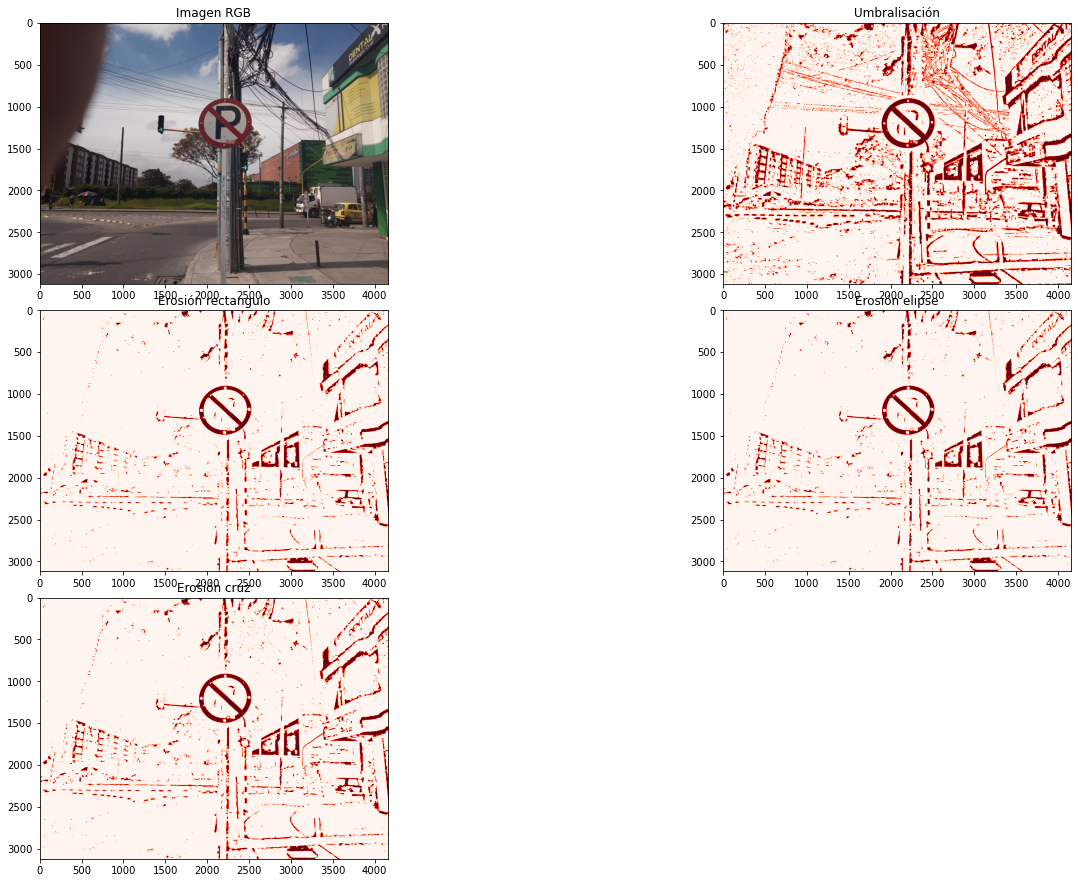

In [9]:
imagen=ima6
ima_umb=umb_adap(imagen,201,-1)
[rect, elipse, cross]=erosion(ima_umb,10,10,8)
plt.figure(1);
plt.subplot(4,2,1);plt.imshow(imagen),plt.title('Imagen RGB')
plt.subplot(4,2,2);plt.imshow(ima_umb,cmap='Reds', vmin=0, vmax=255),plt.title('Umbralisación')
plt.subplot(4,2,3);plt.imshow(rect,cmap='Reds', vmin=0, vmax=255),plt.title('Erosión rectangulo')
plt.subplot(4,2,4);plt.imshow(elipse,cmap='Reds', vmin=0, vmax=255),plt.title('Erosión elipse')
plt.subplot(4,2,5);plt.imshow(cross,cmap='Reds', vmin=0, vmax=255),plt.title('Erosión cruz')
plt.subplots_adjust(top=4, bottom=0.1, left=0.10, right=3, hspace=0.1, wspace=0.2)

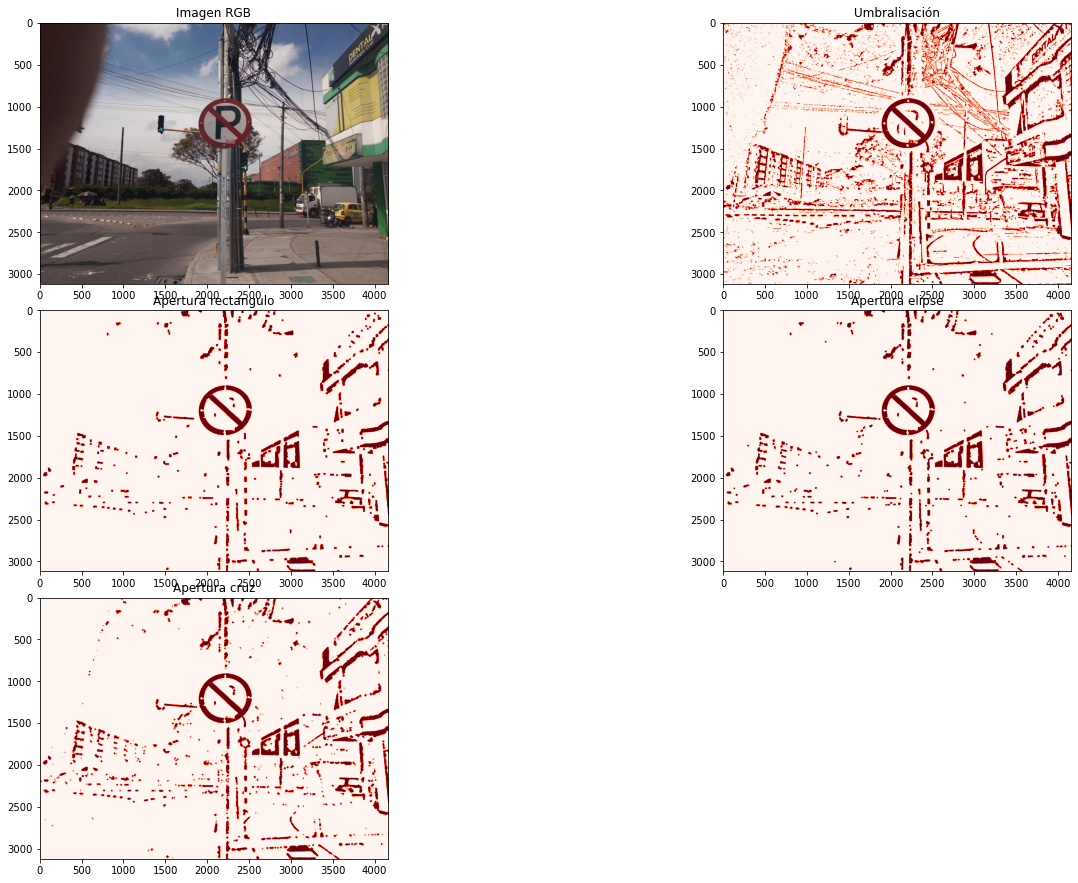

In [10]:
imagen=ima6
ima_umb=umb_adap(imagen,201,-1)
[rect, elipse, cross]=apertura(ima_umb,20,20,8)
plt.figure(1);
plt.subplot(4,2,1);plt.imshow(imagen),plt.title('Imagen RGB')
plt.subplot(4,2,2);plt.imshow(ima_umb,cmap='Reds', vmin=0, vmax=255),plt.title('Umbralisación')
plt.subplot(4,2,3);plt.imshow(rect,cmap='Reds', vmin=0, vmax=255),plt.title('Apertura rectangulo')
plt.subplot(4,2,4);plt.imshow(elipse,cmap='Reds', vmin=0, vmax=255),plt.title('Apertura elipse')
plt.subplot(4,2,5);plt.imshow(cross,cmap='Reds', vmin=0, vmax=255),plt.title('Apertura cruz')
plt.subplots_adjust(top=4, bottom=0.1, left=0.10, right=3, hspace=0.1, wspace=0.2)

In [11]:
imagen=ima6
ima_umb=umb_adap(imagen,201,-1)
[rect, elipse, cross]=cierre(ima_umb,30,30,8)
plt.figure(1);
plt.subplot(4,2,1);plt.imshow(imagen),plt.title('Imagen RGB')
plt.subplot(4,2,2);plt.imshow(ima_umb,cmap='Reds', vmin=0, vmax=255),plt.title('Umbralisación')
plt.subplot(4,2,3);plt.imshow(rect,cmap='Reds', vmin=0, vmax=255),plt.title('Cierre rectangulo')
plt.subplot(4,2,4);plt.imshow(elipse,cmap='Reds', vmin=0, vmax=255),plt.title('Cierre elipse')
plt.subplot(4,2,5);plt.imshow(cross,cmap='Reds', vmin=0, vmax=255),plt.title('Cierre cruz')
plt.subplots_adjust(top=4, bottom=0.1, left=0.10, right=3, hspace=0.1, wspace=0.2)

## Erosión con Apertura

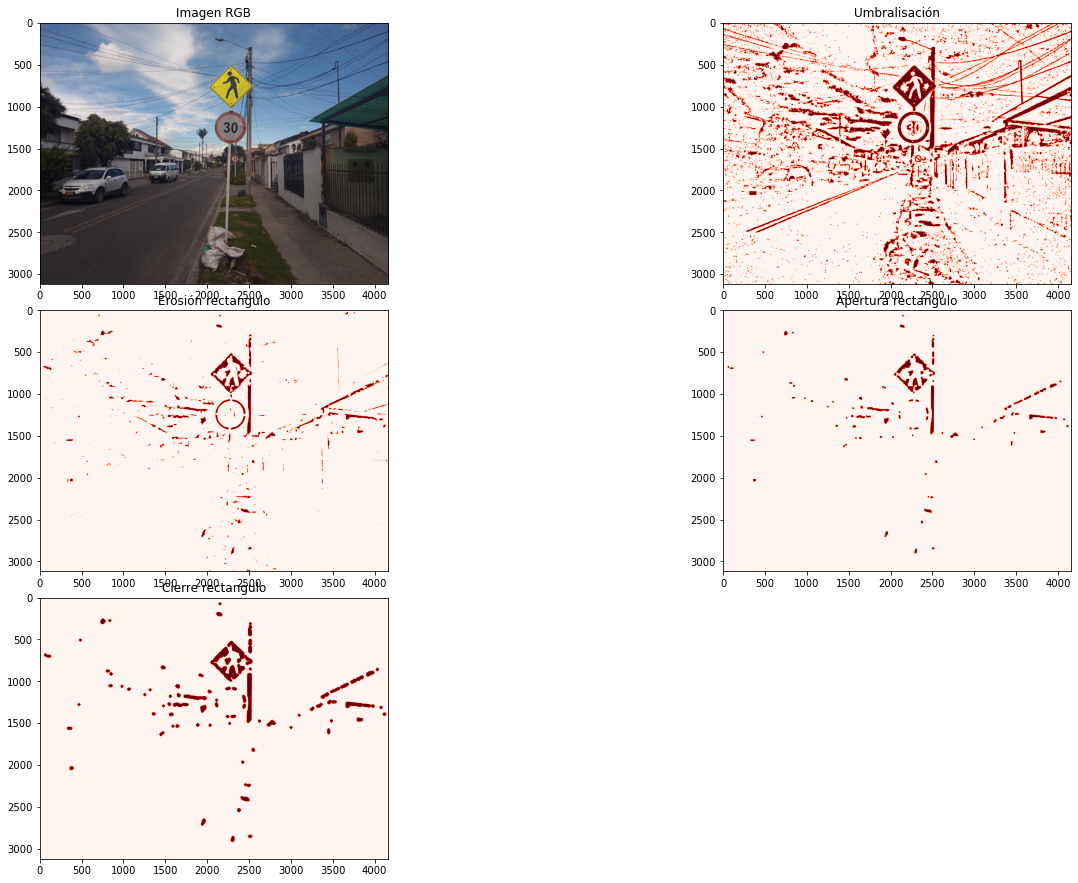

In [12]:
imagen=ima7
ima_umb=umb_adap(imagen,201,-1)
[rect, elipse, cross]=erosion(ima_umb,15,15,3)
img_erosionada=rect.copy()
[rect, elipse, cross]=apertura(img_erosionada,18,18,8)
img_apert=rect.copy()
[rect, elipse, cross]=dilatacion(img_apert,20,20,10)
img_cierre=cross.copy()
plt.figure(1);
plt.subplot(4,2,1);plt.imshow(imagen),plt.title('Imagen RGB')
plt.subplot(4,2,2);plt.imshow(ima_umb,cmap='Reds', vmin=0, vmax=255),plt.title('Umbralisación')
plt.subplot(4,2,3);plt.imshow(img_erosionada,cmap='Reds', vmin=0, vmax=255),plt.title('Erosión rectangulo')
plt.subplot(4,2,4);plt.imshow(img_apert,cmap='Reds', vmin=0, vmax=255),plt.title('Apertura rectangulo')
plt.subplot(4,2,5);plt.imshow(img_cierre,cmap='Reds', vmin=0, vmax=255),plt.title('Cierre rectangulo')
plt.subplots_adjust(top=4, bottom=0.1, left=0.10, right=3, hspace=0.1, wspace=0.2)

## Cierre+Erosión+Apertura

In [13]:
imagen=ima6
ima_umb=umb_adap(imagen,201,-1)
[rect, elipse, cross]=cierre(ima_umb,15,15,3)
img_cierre=rect.copy()
[rect, elipse, cross]=erosion(img_cierre,18,18,10)
img_erosion=rect.copy()
[rect, elipse, cross]=apertura(img_erosion,15,15,10)
img_apertura=cross.copy()
plt.figure(1);
plt.subplot(4,2,1);plt.imshow(imagen),plt.title('Imagen RGB')
plt.subplot(4,2,2);plt.imshow(ima_umb,cmap='Reds', vmin=0, vmax=255),plt.title('Umbralisación')
plt.subplot(4,2,3);plt.imshow(img_cierre,cmap='Reds', vmin=0, vmax=255),plt.title('Cierre rectangulo')
plt.subplot(4,2,4);plt.imshow(img_erosion,cmap='Reds', vmin=0, vmax=255),plt.title('Erosión rectangulo')
plt.subplot(4,2,5);plt.imshow(img_apertura,cmap='Reds', vmin=0, vmax=255),plt.title('Apertura rectangulo')
plt.subplots_adjust(top=4, bottom=0.1, left=0.10, right=3, hspace=0.1, wspace=0.2)

In [14]:
list1 = ['physics', 'chemistry', 1997, 2000];
list2 = [1, 2, 3, 4, 5 ];
list3 = ["a", "b", "c", "d"]

In [15]:
list1

['physics', 'chemistry', 1997, 2000]

In [16]:
list1 = [['physics','a'], 'chemistry', 1997, 2000];

In [17]:
list1

[['physics', 'a'], 'chemistry', 1997, 2000]

In [24]:
len(list1)

4

In [21]:
list1.size()

AttributeError: 'list' object has no attribute 'size'